# Generate routes

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [2]:
data_stops = pd.read_csv('data/uni_molde_v3.csv', sep=';')

# data_stops.loc[data_stops['stop_completed_at'].isna(), 'stop_completed_at'] = "-1"
# data_stops.loc[data_stops['stop_arrived_at'].isna(), 'stop_arrived_at'] = "-1"

print(data_stops.isnull().sum())


sorted_data_stops = data_stops.sort_values(by='stop_dispatched_at', ascending=True)
sorted_data_stops = sorted_data_stops.reset_index(drop=True)
sorted_data_stops['day_of_week'] = pd.to_datetime(sorted_data_stops['stop_arrived_at']).dt.day_name()
sorted_data_stops['date'] = pd.to_datetime(sorted_data_stops['stop_arrived_at']).dt.date

#clustering
locations_df = sorted_data_stops[['current_lat', 'current_lng']]
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(locations_df)
sorted_data_stops['cluster'] = kmeans.labels_ + 1

sorted_data_stops['location_id_craft'] = sorted_data_stops.groupby(['current_lat', 'current_lng']).ngroup()+1
with open('output.txt', 'w') as f:
    print(sorted_data_stops.to_string(), file=f)
print('number of groups', sorted_data_stops['location_id_craft'].nunique())

# data_stops_day= sorted_data_stops[sorted_data_stops['day_of_week'] == "Wednesday"]
grouped_df = sorted_data_stops.groupby('driver_workday_id')[['driver_id', 'location_type_id', 'address_id', 'stop_dispatched_at', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'stop_completed_at', 'cluster', 'location_id_craft','day_of_week', 'date', 'location_is_depot']].apply(lambda x: pd.Series({
    'driver_id': x['driver_id'].tolist(),
    'location_type_id': x['location_type_id'].tolist(),
    'planned_route_location': x['address_id'].tolist(),
    'stop_dispatched_at': x['stop_dispatched_at'].tolist(),
    'stop_arrived_at': x['stop_arrived_at'].tolist(),
    'stop_earliest': x['stop_earliest'].tolist(),
    'stop_latest': x['stop_latest'].tolist(),
    'current_lat': x['current_lat'].tolist(),
    'current_lng': x['current_lng'].tolist(),
    'stop_completed_at': x['stop_completed_at'].tolist(),
    'planned_route_cluster': x['cluster'].tolist(),
    'planned_route_craft': x['location_id_craft'].tolist(),
    'day_of_week': x['day_of_week'].tolist(),
    'date': x['date'].tolist(),
    'location_is_depot': x['location_is_depot'].tolist()
})).reset_index()
grouped_df

stop_completed_at        94
stop_arrived_at         141
stop_latest               0
stop_earliest             0
stop_dispatched_at        0
location_id               0
location_type_id          0
driver_workday_id         0
address_id                0
location_is_depot         0
driver_id                 0
current_lat               0
current_lng               0
prev_planned_lat      27440
prev_planned_lng      27440
prev_actual_lat       27440
prev_actual_lng       27440
dtype: int64
number of groups 11589


,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,location_is_depot
0,297900,"[1255, 1255, 1255, 1255, 1255, 1255, 1255, 125...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 118973, 118854, 118820, 118623, 11909...","[2024-01-01 19:41:35.136881+00, 2024-01-01 19:...","[2024-01-01 22:14:16.454324+00, 2024-01-01 23:...","[2024-01-01 19:00:00+00, 2024-01-01 23:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 03:00:00+0...","[55.6465393, 55.6669147, 55.676665, 55.6757322...","[12.1522978, 12.5262801, 12.566428, 12.5619711...","[2024-01-01 22:14:54.872731+00, 2024-01-01 23:...","[5, 777, 11, 728, 728, 281, 281, 281, 281, 405]","[1169, 1405, 1577, 1560, 1479, 1391, 1434, 141...","[Monday, Monday, Monday, Tuesday, Monday, Tues...","[2024-01-01, 2024-01-01, 2024-01-01, 2024-01-0...","[True, False, False, False, False, False, Fals..."
1,297906,"[1195, 1195, 1195, 1195, 1195, 1195, 1195]","[1, 2, 2, 2, 2, 2, 2]","[122267, 120295, 120297, 118930, 120298, 13328...","[2024-01-01 19:42:05.147145+00, 2024-01-01 19:...","[2024-01-01 20:50:17.003744+00, 2024-01-02 02:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.662018, 55.662429, 55.6727433,...","[12.1522978, 12.360745, 12.363469, 12.3935111,...","[2024-01-01 20:50:29.721122+00, 2024-01-02 02:...","[5, 676, 676, 883, 676, 676, 676]","[1169, 1352, 1356, 1508, 1350, 1312, 1401]","[Monday, Tuesday, Tuesday, Tuesday, Tuesday, T...","[2024-01-01, 2024-01-02, 2024-01-02, 2024-01-0...","[True, False, False, False, False, False, False]"
2,297908,"[1176, 1176, 1176, 1176, 1176, 1176, 1176, 117...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[122267, 120515, 119217, 119215, 119170, 13445...","[2024-01-01 21:25:47.230131+00, 2024-01-01 21:...","[2024-01-01 23:06:27.627368+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.619592, 55.636304, 55.631888, ...","[12.1522978, 12.028735, 12.044857, 12.055067, ...","[2024-01-01 23:06:36.064172+00, 2024-01-02 01:...","[5, 845, 443, 443, 634, 699, 787, 787, 787, 78...","[1169, 960, 1049, 1026, 982, 916, 1284, 1281, ...","[Monday, Tuesday, Tuesday, Tuesday, Tuesday, T...","[2024-01-01, 2024-01-02, 2024-01-02, 2024-01-0...","[True, False, False, False, False, False, Fals..."
3,297911,"[1197, 1197, 1197, 1197, 1197, 1197, 1197, 119...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 145327, 133259, 133259, 133259, 13325...","[2024-01-01 19:42:59.704147+00, 2024-01-01 19:...","[2024-01-02 00:09:15.241119+00, 2024-01-02 04:...","[2024-01-02 00:00:00+00, 2024-01-02 04:30:00+0...","[2024-01-02 22:00:00+00, 2024-01-02 08:00:00+0...","[55.6465393, 54.65117396302384, 54.666191, 54....","[12.1522978, 11.375901220879824, 11.333044, 11...","[2024-01-02 00:09:21.131516+00, 2024-01-02 04:...","[5, 872, 77, 77, 77, 77, 77, 77, 533, 872]","[1169, 7, 23, 23, 23, 23, 23, 23, 12, 4]","[Tuesday, Tuesday, Tuesday, Tuesday, Tuesday, ...","[2024-01-02, 2024-01-02, 2024-01-02, 2024-01-0...","[True, False, False, False, False, False, Fals..."
4,297919,"[1218, 1218, 1218, 1218, 1218, 1218, 1218, 121...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[122267, 119426, 118790, 119069, 118805, 11885...","[2024-01-01 19:46:51.16173+00, 2024-01-01 19:4...","[2024-01-01 23:05:52.039818+00, 2024-01-02 01:...","[2024-01-01 19:00:00+00, 2024-01-01 21:00:00+0...","[2024-01-02 01:00:00+00, 2024-01-02 04:00:00+0...","[55.6465393, 55.62296, 55.562168, 55.6381577, ...","[12.1522978, 12.615835, 12.576841, 12.6515491,...","[2024-01-01 23:05:58.283704+00, 2024-01-02 01:...","[5, 286, 472, 139, 266, 405, 405, 178, 359, 57...","[1169, 965, 818, 1070, 1658, 1168, 1166, 888, ...","[Monday, Tuesday, Tuesday, Tuesday, Tuesday, T...","[2024-01-01, 2024-01-02, 2024-01-02, 202

In [5]:
from geopy.distance import geodesic
import pandas as pd

# Function to calculate distance between two coordinates
def calculate_distance(row):
    distances = []
    for i in range(len(row['planned_route_craft'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['planned_route_craft'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

def calculate_distance_actual(row):
    distances = []
    for i in range(len(row['actual_route_location'])-1):
        coords_1 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i], ['current_lng']].values[0][0])
        coords_2 = (sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lat']].values[0][0],
                     sorted_data_stops.loc[sorted_data_stops['location_id_craft'] == row['actual_route_location'][i+1], ['current_lng']].values[0][0])
        distances.append(geodesic(coords_1, coords_2).miles)
    return distances

# Create a new column 'distance_route' in 'final_routes'
# grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)
grouped_df['distance_route'] = grouped_df.apply(calculate_distance, axis=1)
# total_sum_distance = grouped_df['distance_route'].sum()
# grouped_df['total_distance'] = total_sum_distance

In [3]:
indexes_to_drop = grouped_df[grouped_df['driver_id'].apply(lambda x: len(x) == 1)].index

grouped_df = grouped_df.drop(indexes_to_drop)

# Step 3: Reset the index
grouped_df = grouped_df.reset_index(drop=True)

In [4]:
grouped_df['total_distance_planned'] = grouped_df['distance_route'].apply(sum)
grouped_df

KeyError: 'distance_route'

In [4]:
index_routes_with_na = []
for i in range(len(grouped_df)):
    row = grouped_df.iloc[i]
    if pd.isna(pd.Series(row['stop_arrived_at'])).any():
        index_routes_with_na.append(i)
print("The number of routes where one value is NA(arrived time)", len(index_routes_with_na))
routes = grouped_df.drop(index_routes_with_na)
routes.reset_index(drop=True)
#
routes = routes[routes.apply(lambda row: max(row['stop_dispatched_at']) < min(row['stop_completed_at']), axis=1)]
routes.reset_index(drop=True)
print(len(routes))

The number of routes where one value is NA(arrived time) 132
20658


In [5]:
#check if it is the same driver in the route
def get_mode(x):
    return pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else np.nan

for i in routes['driver_id']:
    if not all(x == i[0] for x in i):
            print('Not the same driver in the route')
routes['driver_id'] = routes['driver_id'].apply(lambda x : x[0])

routes['day_of_week'] = routes['day_of_week'].apply(get_mode)
routes['date'] = routes['date'].apply(get_mode)

routes['date'] = pd.to_datetime(routes['date'])
routes['last_two_weeks_count'] = routes.apply(lambda row:
                                      routes[(routes['driver_id'] == row['driver_id']) &
                                         (row['date'] - routes['date']).dt.days.between(-14, 0)].shape[0],
                                      axis=1)
routes = routes[(routes['date'] < '2024-01-01') | (routes['date'] > '2024-01-14')]

In [6]:
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,location_is_depot,last_two_weeks_count
258,300698,1004,"[1, 2, 1, 2]","[32757, 81843, 32757, 81843]","[2023-12-22 11:29:48.589255+00, 2023-12-22 11:...","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[2024-01-02 08:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 23:00:00+00, 2024-01-02 23:00:00+0...","[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[162, 48, 162, 48]","[11372, 5561, 11372, 5561]",Friday,2023-12-22,"[True, False, True, False]",1
626,303658,813,"[1, 1, 2, 2, 2]","[32757, 32757, 40085, 39979, 39979]","[2024-01-04 04:20:01.568488+00, 2024-01-04 10:...","[2024-01-18 11:22:40.440593+00, 2024-01-18 11:...","[2024-01-04 06:00:00+00, 2024-01-04 06:00:00+0...","[2024-01-05 15:00:00+00, 2024-01-04 15:00:00+0...","[63.43263220000001, 63.43263220000001, 64.8605...","[10.3643774, 10.3643774, 11.282892, 11.621855,...","[2024-01-18 11:22:46.693473+00, 2024-01-18 11:...","[162, 162, 146, 15, 15]","[11372, 11372, 11522, 11524, 11524]",Thursday,2024-01-18,"[True, True, False, False, False]",2
818,305194,1255,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]","[153184, 118973, 118623, 118820, 118854, 11909...","[2024-01-14 20:34:26.331856+00, 2024-01-14 20:...","[2024-01-14 22:18:10.877867+00, 2024-01-14 23:...","[2024-01-14 19:00:00+00, 2024-01-14 23:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 03:00:00+0...","[55.64641920439919, 55.6669147, 55.671473, 55....","[12.15372974969827, 12.5262801, 12.561174, 12....","[2024-01-15 10:08:38.063407+00, 2024-01-15 10:...","[5, 777, 728, 728, 11, 281, 281, 281, 405, 5, ...","[1167, 1405, 1479, 1560, 1577, 1391, 1434, 139...",Monday,2024-01-15,"[True, False, False, False, False, False, Fals...",9
819,305195,1195,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 120295, 120297, 118930, 120299, 13328...","[2024-01-14 20:35:37.938166+00, 2024-01-14 20:...","[2024-01-14 20:37:26.906297+00, 2024-01-15 01:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.662018, 55.662429, 55.6...","[12.15372974969827, 12.360745, 12.363469, 12.3...","[2024-01-14 20:37:41.964548+00, 2024-01-15 01:...","[5, 676, 676, 883, 78, 676, 676, 676]","[1167, 1352, 1356, 1508, 1286, 1312, 1350, 1401]",Monday,2024-01-15,"[True, False, False, False, False, False, Fals...",12
820,305196,1186,"[1, 2, 2, 2, 2, 2, 2]","[153184, 118945, 118941, 126319, 119107, 12031...","[2024-01-14 20:36:17.999501+00, 2024-01-14 20:...","[2024-01-14 22:44:00.301829+00, 2024-01-15 02:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.7498333, 55.73628, 55.7...","[12.15372974969827, 12.5870785, 12.574717, 12....","[2024-01-14 22:44:10.218613+00, 2024-01-15 02:...","[5, 960, 181, 189, 107, 40, 922]","[1167, 2231, 2174, 2298, 2406, 2588, 2493]",Monday,2024-01-15,"[True, False, False, False, False, False, False]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428,442391,968,"[1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]","[46452, 44276, 46120, 46866, 44979, 44976, 468...","[2024-08-06 19:08:15.862161+00, 2024-08-06 19:...","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...","[2024-08-07 04:49:12.961702+00, 2024-08-07 05:...","[83, 482, 482, 771, 225, 771, 771, 225, 225, 8...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",Wednesday,2024-08-07,"[True, False, False, False, False, False, Fals...",1
27429,442393,877,"[1, 2, 2, 2, 2, 2, 2]","[23977,

In [7]:
def create_actual_route(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row[column][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

def create_actual_route_type(df, column):
    res_col = []
    for i in range(len(df)):
        row = df.iloc[i]
        sorted_dates = sorted(row['stop_arrived_at'])
        mapping = {}
        for i, date in enumerate(sorted_dates):
            mapping[date] = row['location_type_id'][i]
        res_val = [mapping[row['stop_arrived_at'][i]] for i in range(len(row['stop_arrived_at']))]
        res_col.append(res_val)
    return res_col

routes['actual_route_location'] = create_actual_route(routes, 'planned_route_craft')
routes['actual_route_type'] = create_actual_route_type(routes, 'planned_route_craft')
# routes['distance_actual_route'] = routes.apply(calculate_distance_actual, axis=1)
# routes['total_distance_actual'] = routes['distance_actual_route'].apply(sum)
routes

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,location_is_depot,last_two_weeks_count,actual_route_location,actual_route_type
258,300698,1004,"[1, 2, 1, 2]","[32757, 81843, 32757, 81843]","[2023-12-22 11:29:48.589255+00, 2023-12-22 11:...","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[2024-01-02 08:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 23:00:00+00, 2024-01-02 23:00:00+0...","[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[162, 48, 162, 48]","[11372, 5561, 11372, 5561]",Friday,2023-12-22,"[True, False, True, False]",1,"[11372, 5561, 11372, 5561]","[1, 2, 1, 2]"
626,303658,813,"[1, 1, 2, 2, 2]","[32757, 32757, 40085, 39979, 39979]","[2024-01-04 04:20:01.568488+00, 2024-01-04 10:...","[2024-01-18 11:22:40.440593+00, 2024-01-18 11:...","[2024-01-04 06:00:00+00, 2024-01-04 06:00:00+0...","[2024-01-05 15:00:00+00, 2024-01-04 15:00:00+0...","[63.43263220000001, 63.43263220000001, 64.8605...","[10.3643774, 10.3643774, 11.282892, 11.621855,...","[2024-01-18 11:22:46.693473+00, 2024-01-18 11:...","[162, 162, 146, 15, 15]","[11372, 11372, 11522, 11524, 11524]",Thursday,2024-01-18,"[True, True, False, False, False]",2,"[11372, 11524, 11522, 11524, 11372]","[1, 2, 2, 2, 1]"
818,305194,1255,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]","[153184, 118973, 118623, 118820, 118854, 11909...","[2024-01-14 20:34:26.331856+00, 2024-01-14 20:...","[2024-01-14 22:18:10.877867+00, 2024-01-14 23:...","[2024-01-14 19:00:00+00, 2024-01-14 23:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 03:00:00+0...","[55.64641920439919, 55.6669147, 55.671473, 55....","[12.15372974969827, 12.5262801, 12.561174, 12....","[2024-01-15 10:08:38.063407+00, 2024-01-15 10:...","[5, 777, 728, 728, 11, 281, 281, 281, 405, 5, ...","[1167, 1405, 1479, 1560, 1577, 1391, 1434, 139...",Monday,2024-01-15,"[True, False, False, False, False, False, Fals...",9,"[1167, 1405, 1479, 1577, 1560, 1391, 1391, 143...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]"
819,305195,1195,"[1, 2, 2, 2, 2, 2, 2, 2]","[153184, 120295, 120297, 118930, 120299, 13328...","[2024-01-14 20:35:37.938166+00, 2024-01-14 20:...","[2024-01-14 20:37:26.906297+00, 2024-01-15 01:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.662018, 55.662429, 55.6...","[12.15372974969827, 12.360745, 12.363469, 12.3...","[2024-01-14 20:37:41.964548+00, 2024-01-15 01:...","[5, 676, 676, 883, 78, 676, 676, 676]","[1167, 1352, 1356, 1508, 1286, 1312, 1350, 1401]",Monday,2024-01-15,"[True, False, False, False, False, False, Fals...",12,"[1167, 1286, 1508, 1352, 1312, 1350, 1356, 1401]","[1, 2, 2, 2, 2, 2, 2, 2]"
820,305196,1186,"[1, 2, 2, 2, 2, 2, 2]","[153184, 118945, 118941, 126319, 119107, 12031...","[2024-01-14 20:36:17.999501+00, 2024-01-14 20:...","[2024-01-14 22:44:00.301829+00, 2024-01-15 02:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.7498333, 55.73628, 55.7...","[12.15372974969827, 12.5870785, 12.574717, 12....","[2024-01-14 22:44:10.218613+00, 2024-01-15 02:...","[5, 960, 181, 189, 107, 40, 922]","[1167, 2231, 2174, 2298, 2406, 2588, 2493]",Monday,2024-01-15,"[True, False, False, False, False, False, False]",9,"[1167, 2588, 2493, 2174, 2231, 2406, 2298]","[1, 2, 2, 2, 2, 2, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27428,442391,968,"[1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]","[46452, 44276, 46120, 46866, 44979, 44976, 468...","[2024-08-06 19:08:15.862161+00, 2024-08-06 19:...","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","

In [53]:
routes = routes.reset_index(drop=True)
more_than_one_1 = routes[routes['location_is_depot'].apply(lambda x: x[0] != True)]
len(more_than_one_1), len(routes)

# more_than_one_1_2 = more_than_one_1[more_than_one_1['location_type_id'].apply(lambda x: x[0] != 1)]
#
# more_than_one_1_2
more_than_one_1

,driver_workday_id,driver_id,location_type_id,planned_route_location,stop_dispatched_at,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,stop_completed_at,planned_route_cluster,planned_route_craft,day_of_week,date,location_is_depot,last_two_weeks_count,actual_route_location,actual_route_type
108,306459,1264,"[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[134330, 125788, 125788, 119826, 119811, 11981...","[2024-01-16 05:06:21.671072+00, 2024-01-16 05:...","[2024-01-16 05:50:47.179107+00, 2024-01-16 05:...","[2024-01-16 07:00:00+00, 2024-01-16 05:00:00+0...","[2024-01-16 14:00:00+00, 2024-01-16 13:00:00+0...","[55.1761729, 55.0915251, 55.0915251, 55.071866...","[14.8104361, 14.6956755, 14.6956755, 14.808775...","[2024-01-16 05:50:53.112654+00, 2024-01-16 05:...","[461, 998, 998, 338, 247, 247, 247, 506, 205, ...","[433, 324, 324, 308, 306, 305, 298, 254, 280, ...",Tuesday,2024-01-16,"[False, True, True, False, False, False, False...",9,"[433, 324, 324, 308, 305, 298, 306, 254, 287, ...","[1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"
256,309312,1081,"[1, 2, 1, 2]","[80079, 81843, 81843, 81126]","[2024-01-12 10:17:27.586081+00, 2024-01-12 10:...","[2024-01-15 09:25:05.530958+00, 2024-01-15 09:...","[2024-01-15 05:00:00+00, 2024-01-15 05:00:00+0...","[2024-01-15 22:59:00+00, 2024-01-15 22:59:00+0...","[56.4556169, 59.47300010000001, 59.47300010000...","[10.0518195, 10.3183178, 10.3183178, 10.384787]","[2024-01-15 11:28:05.026184+00, 2024-01-15 11:...","[337, 48, 48, 604]","[4134, 5561, 5561, 5228]",Monday,2024-01-15,"[False, False, False, False]",7,"[4134, 5561, 5561, 5228]","[1, 2, 1, 2]"
286,309760,1431,"[1, 1, 1, 1, 1, 2]","[38703, 103973, 49492, 49492, 49492, 46452]","[2024-01-12 20:02:15.569845+00, 2024-01-12 20:...","[2024-01-15 08:20:27.303815+00, 2024-01-15 08:...","[2024-01-15 06:00:00+00, 2024-01-15 06:00:00+0...","[2024-01-15 14:00:00+00, 2024-01-15 13:00:00+0...","[60.776699, 60.776397, 60.775824, 60.775824, 6...","[10.694848, 10.695989, 10.696741, 10.696741, 1...","[2024-01-15 09:52:39.505549+00, 2024-01-15 09:...","[251, 251, 251, 251, 251, 83]","[10851, 10850, 10848, 10848, 10848, 7166]",Monday,2024-01-15,"[False, False, False, False, False, True]",11,"[10851, 10850, 10848, 10848, 10848, 7166]","[1, 1, 1, 1, 1, 2]"
298,309777,1152,"[1, 1, 1, 1, 2]","[77649, 77649, 77649, 49665, 46452]","[2024-01-12 20:02:10.103038+00, 2024-01-12 20:...","[2024-01-15 11:47:15.586655+00, 2024-01-15 11:...","[2024-01-15 06:00:00+00, 2024-01-15 11:00:00+0...","[2024-01-15 15:00:00+00, 2024-01-15 15:00:00+0...","[59.76719409999999, 59.76719409999999, 59.7671...","[10.8334214, 10.8334214, 10.8334214, 10.942630...","[2024-01-15 12:34:27.980042+00, 2024-01-15 12:...","[249, 249, 249, 686, 83]","[6977, 6977, 6977, 9175, 7166]",Monday,2024-01-15,"[False, False, False, False, True]",7,"[6977, 6977, 6977, 9175, 7166]","[1, 1, 1, 1, 2]"
303,309784,673,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[41215, 41215, 41215, 41215, 49804, 41215, 412...","[2024-01-12 20:02:16.870492+00, 2024-01-12 20:...","[2024-01-15 07:00:26.067207+00, 2024-01-15 06:...","[2024-01-15 05:00:00+00, 2024-01-15 05:00:00+0...","[2024-01-15 13:00:00+00, 2024-01-15 13:00:00+0...","[59.907336, 59.907336, 59.907336, 59.907336, 5...","[10.489886, 10.489886, 10.489886, 10.489886, 1...","[2024-01-15 07:00:34.183321+00, 2024-01-15 06:...","[502, 502, 502, 502, 502, 502, 502, 502, 502, ...","[7894, 7894, 7894, 7894, 7893, 7894, 7894, 787...",Monday,2024-01-15,"[False, False, False, False, False, False, Fal...",6,"[7893, 7894, 7879, 7894, 7894, 7894, 7894, 789...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,440206,613,"[1, 2]","[79831, 32757]","[2024-08-02 07:55:50.531401+00, 2024-08-02 07:...","[2024-08-05 08:56:27.965156+00, 2024-08-05 08:...","[2024-08-05 04:00:00+00, 2024-08-05 05:00:00+00]","[2024-08-05 14:00:00+00, 2024-08-06 14:00:00+00]","[59.473048, 63.43263220000001]","[10.318836, 10.3643774]

In [42]:
routes['difference_distance'] = routes['total_distance_actual'] - routes['total_distance_planned']

KeyError: 'total_distance_actual'

In [43]:
planned_routes = routes[['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'difference_distance']]
actual_routes = routes['actual_route_location']

KeyError: "['difference_distance'] not in index"

In [42]:
routes['difference_distance'].describe()
# routes['difference_distance'].idxmin()
routes['difference_distance'].median()
sum(routes['difference_distance'] > 3)

6282

In [56]:
planned_routes.iloc[19207]

planned_route_craft                                         [11524, 11372]
actual_route_location                                       [11372, 11524]
driver_id                                                              813
day_of_week                                                         Friday
last_two_weeks_count                                                     1
location_type_id                                                    [2, 1]
stop_arrived_at          [2024-08-02 11:52:39.175879+00, 2024-08-02 11:...
stop_earliest             [2024-08-01 05:00:00+00, 2024-08-01 05:00:00+00]
stop_latest               [2024-08-01 14:00:00+00, 2024-08-01 14:00:00+00]
current_lat                                 [64.861066, 63.43263220000001]
current_lng                                        [11.621855, 10.3643774]
difference_distance                                                    0.0
Name: 26903, dtype: object

In [52]:
planned_routes_list = planned_routes['planned_route_craft'].tolist()
actual_routes_list = actual_routes.tolist()

# filtered_rows = []
#
# for row in actual_routes_list:
#     if row not in planned_routes_list:
#         filtered_rows.append(row)

#duplicated removed
# planned_routes_list = [array for i, array in enumerate(planned_routes_list) if array not in planned_routes_list[:i]]
# actual_routes_list = [array for i, array in enumerate(filtered_rows) if array not in filtered_rows[:i]]
len(planned_routes_list),len(actual_routes_list)

(19623, 19623)

# Edit distance

In [53]:
# Edit Distance

def minDistance(word1, word2) -> int:
    m = len(word1)
    n = len(word2)
    # dp[i][j] := min # Of operations to convert word1[0..i) to word2[0..j)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
      dp[i][0] = i

    for j in range(1, n + 1):
      dp[0][j] = j

    for i in range(1, m + 1):
      for j in range(1, n + 1):
        if word1[i - 1] == word2[j - 1]:
          dp[i][j] = dp[i - 1][j - 1]
        else:
          dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1

    return dp[m][n]

print(minDistance([878, 1526, 1613, 1706, 1857, 1777], [878, 1526, 1706, 1613, 1777, 1857]))

3


# Route quality score

In [54]:
def calculate_route_quality_score(planned_ranks, actual_ranks):
    # Calculate sum of absolute differences in ranks
    sum_of_differences = sum(abs(actual_ranks.index(x) - planned_ranks.index(x)) for x in planned_ranks)

    # Calculate max possible difference
    max_possible_difference = sum([abs(2 * i - (len(planned_ranks) + 1)) for i in range(1, len(planned_ranks) + 1)])

    # Calculate route quality score
    route_quality_score = 1 - (sum_of_differences / max_possible_difference)

    return route_quality_score

For each driver-day, we consider only the planned route. For each planned route we calculate how much it deviates from the actual route (e.g., use some form of edit distance - see https://link.springer.com/article/10.1007/s10732-006-9001-3?), which is then normalized (divide by max edit distance, or number of visits or something?) to the interval [0, 1]. Then, a planned route is good if this distance (between planned and actual) is less than a certain threshold and otherwise it is bad. This becomes the label (bad/good)

In [57]:
completed_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'score'])
uncompleted_routes_df = pd.DataFrame(columns=['planned_route_craft', 'actual_route_location', 'driver_id', 'day_of_week', 'distance_route', 'last_two_weeks_count', 'location_type_id', 'stop_arrived_at', 'stop_earliest', 'stop_latest', 'current_lat', 'current_lng', 'edit_distance', 'score'])
#11700795
for i in range(len(planned_routes_list)):
    # editDistance = minDistance(planned_routes_list[i],actual_routes_list[i])
    score = calculate_route_quality_score(planned_routes_list[i],actual_routes_list[i])
    if score != 0:
        completed_routes_df = pd.concat([completed_routes_df, pd.DataFrame([planned_routes.iloc[i]]).assign(score=score).reset_index(drop=True)], ignore_index=True)


print(len(completed_routes_df))
# completed_routes_df

/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_97305/1596968305.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  completed_routes_df = pd.concat([completed_routes_df, pd.DataFrame([planned_routes.iloc[i]]).assign(score=score).reset_index(drop=True)], ignore_index=True)


19597


In [58]:
drivers_dic = {}
k = 1
for driver in completed_routes_df['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in completed_routes_df['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
completed_routes_df['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)
completed_routes_df

Total number of drivers 412


,planned_route_craft,actual_route_location,driver_id,day_of_week,last_two_weeks_count,location_type_id,stop_arrived_at,stop_earliest,stop_latest,current_lat,current_lng,score,difference_distance,driver_id_sorted
0,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,Friday,1,"[1, 2, 1, 2]","[2024-01-04 10:40:25.056135+00, 2024-01-04 10:...","[2024-01-02 08:00:00+00, 2024-01-02 08:00:00+0...","[2024-01-02 23:00:00+00, 2024-01-02 23:00:00+0...","[63.43263220000001, 59.47300010000001, 63.4326...","[10.3643774, 10.3183178, 10.3643774, 10.3183178]",1.000000,0.000000,1
1,"[11372, 11372, 11522, 11524, 11524]","[11372, 11524, 11522, 11524, 11372]",813,Thursday,2,"[1, 1, 2, 2, 2]","[2024-01-18 11:22:40.440593+00, 2024-01-18 11:...","[2024-01-04 06:00:00+00, 2024-01-04 06:00:00+0...","[2024-01-05 15:00:00+00, 2024-01-04 15:00:00+0...","[63.43263220000001, 63.43263220000001, 64.8605...","[10.3643774, 10.3643774, 11.282892, 11.621855,...",0.666667,119.252540,2
2,"[1167, 1405, 1479, 1560, 1577, 1391, 1434, 139...","[1167, 1405, 1479, 1577, 1560, 1391, 1391, 143...",1255,Monday,9,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]","[2024-01-14 22:18:10.877867+00, 2024-01-14 23:...","[2024-01-14 19:00:00+00, 2024-01-14 23:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 03:00:00+0...","[55.64641920439919, 55.6669147, 55.671473, 55....","[12.15372974969827, 12.5262801, 12.561174, 12....",0.950000,0.063470,3
3,"[1167, 1352, 1356, 1508, 1286, 1312, 1350, 1401]","[1167, 1286, 1508, 1352, 1312, 1350, 1356, 1401]",1195,Monday,12,"[1, 2, 2, 2, 2, 2, 2, 2]","[2024-01-14 20:37:26.906297+00, 2024-01-15 01:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.662018, 55.662429, 55.6...","[12.15372974969827, 12.360745, 12.363469, 12.3...",0.625000,0.449076,4
4,"[1167, 2231, 2174, 2298, 2406, 2588, 2493]","[1167, 2588, 2493, 2174, 2231, 2406, 2298]",1186,Monday,9,"[1, 2, 2, 2, 2, 2, 2]","[2024-01-14 22:44:00.301829+00, 2024-01-15 02:...","[2024-01-14 19:00:00+00, 2024-01-14 21:00:00+0...","[2024-01-15 01:00:00+00, 2024-01-15 04:00:00+0...","[55.64641920439919, 55.7498333, 55.73628, 55.7...","[12.15372974969827, 12.5870785, 12.574717, 12....",0.333333,3.136546,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19592,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,Wednesday,1,"[1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]","[2024-08-07 03:50:55.931321+00, 2024-08-07 05:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.749221, 59.747942, 59.737167777...","[10.290383, 10.26819, 10.291249, 10.3725904226...",0.976190,-1.347492,344
19593,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,Wednesday,1,"[1, 2, 2, 2, 2, 2, 2]","[2024-08-07 13:31:50.711864+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+0...","[60.007627, 59.923836, 59.93422, 59.811373, 59...","[11.047135, 10.814451, 10.800594, 10.80755, 10...",1.000000,0.000000,182
19594,"[7166, 7127, 7166, 9527]","[7166, 7166, 7127, 9527]",1417,Wednesday,1,"[1, 2, 1, 2]","[2024-08-07 06:38:14.810272+00, 2024-08-07 07:...","[2024-08-07 02:00:00+00, 2024-08-07 05:00:00+0...","[2024-08-07 20:00:00+00, 2024-08-07 07:00:00+0...","[59.805664, 59.795058, 59.805664, 59.948098894...","[10.290383, 10.279009, 10.290383, 10.771520299...",0.875000,-0.113960,189
19595,"[10076, 7846]","[10076, 7846]",874,Wednesday,1,"[1, 2]","[2024-08-07 13:31:52.652071+00, 2024-08-07 13:...","[2024-08-07 01:00:00+00, 2024-08-07 05:00:00+00]","[2024-08-07 14:00:00+00, 2024-08-07 11:00:00+00]","[60.007627, 59.905421]","[11.047135, 10.618603]",1.000000,0.000000,183


In [59]:
sunday_count = completed_routes_df[completed_routes_df["day_of_week"] == "Sunday"].shape[0]
print(f"Number of rows on Sunday: {sunday_count}")

Number of rows on Sunday: 211


In [60]:
# completed_routes_list_unique = [array for i, array in enumerate(completed_routes_list) if array not in completed_routes_list[:i]]
# uncompleted_routes_list_unique = [array for i, array in enumerate(uncompleted_routes_list) if array not in uncompleted_routes_list[:i]]
# len(completed_routes_list_unique), len (uncompleted_routes_list_unique)
# len(completed_routes_df), len(uncompleted_routes_df)

In [61]:
final_routes = pd.DataFrame({
    'routes': completed_routes_df['planned_route_craft'].tolist(),
    'actual_routes': completed_routes_df['actual_route_location'].tolist(),
    'driver_id': completed_routes_df['driver_id'].tolist() ,
    'last_two_weeks_count': completed_routes_df['last_two_weeks_count'].tolist(),
    'day_of_week': completed_routes_df['day_of_week'].tolist(),
    'score': completed_routes_df['score'].tolist()
    # 'current_lat': completed_routes_df['current_lat'].tolist(),
    # 'current_lng': completed_routes_df['current_lng'].tolist(),
    # 'day_of_week': completed_routes_df['day_of_week'].tolist() + uncompleted_routes_df['day_of_week'].tolist(),
})
final_routes['len'] = final_routes['routes'].apply(lambda x: len(x))
final_routes

# [0] * len(artificial_planned_routes)
# artificial_planned_routes['distance_route'].tolist()
# artificial_planned_routes['driver_id'].tolist()
# artificial_planned_routes['common_subsequence'].tolist()

,routes,actual_routes,driver_id,last_two_weeks_count,day_of_week,score,len
0,"[11372, 5561, 11372, 5561]","[11372, 5561, 11372, 5561]",1004,1,Friday,1.000000,4
1,"[11372, 11372, 11522, 11524, 11524]","[11372, 11524, 11522, 11524, 11372]",813,2,Thursday,0.666667,5
2,"[1167, 1405, 1479, 1560, 1577, 1391, 1434, 139...","[1167, 1405, 1479, 1577, 1560, 1391, 1391, 143...",1255,9,Monday,0.950000,11
3,"[1167, 1352, 1356, 1508, 1286, 1312, 1350, 1401]","[1167, 1286, 1508, 1352, 1312, 1350, 1356, 1401]",1195,12,Monday,0.625000,8
4,"[1167, 2231, 2174, 2298, 2406, 2588, 2493]","[1167, 2588, 2493, 2174, 2231, 2406, 2298]",1186,9,Monday,0.333333,7
...,...,...,...,...,...,...,...
19592,"[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...","[7166, 6718, 6699, 6495, 6560, 6558, 6756, 653...",968,1,Wednesday,0.976190,13
19593,"[10076, 8785, 9172, 7204, 6955, 5902, 7045]","[10076, 8785, 9172, 7204, 6955, 5902, 7045]",877,1,Wednesday,1.000000,7
19594,"[7166, 7127, 7166, 9527]","[7166, 7166, 7127, 9527]",1417,1,Wednesday,0.875000,4
19595,"[10076, 7846]","[10076, 7846]",874,1,Wednesday,1.000000,2


In [62]:

max([len(i) for i in final_routes['routes']])

36

In [63]:
#create dictionary and encode to smaller unique numbers
locations_dic = {}
location_count = {}
k = 1
for row in final_routes['routes']:
   for location in row:
       if location not in locations_dic:
           locations_dic[location] = k
           k += 1

print(len(locations_dic))

for row in final_routes['routes']:
   for location in row:
       if location not in location_count:
            location_count[location] = 1
       else:
            location_count[location] += 1


10836


In [64]:
drivers_dic = {}
k = 1
for driver in final_routes['driver_id']:
    if driver not in drivers_dic:
        drivers_dic[driver] = k
        k += 1
print('Total number of drivers', len(drivers_dic))
total_drivers = len(drivers_dic)
encoding_drivers = []
for driver in final_routes['driver_id']:
    encoding_drivers.append(drivers_dic[driver])
#
final_routes['driver_id_sorted'] = encoding_drivers
# final_routes = pd.concat([final_routes, pd.get_dummies(final_routes['driver_id_sorted'], prefix='encoding_drivers')], axis=1)

Total number of drivers 412


# Average benchmark here

In [65]:
result = final_routes.groupby('driver_id_sorted')[['driver_id_sorted', 'score']].apply(
    lambda x: pd.Series({'count': len(x), 'score': x['score'].tolist()})
).reset_index()

sorted_result = result.sort_values(by='count', ascending=False).reset_index(drop=True)

sorted_result.to_csv('sorted_result.csv', index=False)
print(sorted_result)

     driver_id_sorted  count  \
0                   4    143   
1                   6    127   
2                   9    126   
3                  32    123   
4                  53    121   
..                ...    ...   
407               362      1   
408               383      1   
409               216      1   
410               368      1   
411               412      1   

                                                 score  
0    [0.625, 0.875, 0.36, 0.75, 0.6875, 0.6, 0.5625...  
1    [0.25, 0.625, 0.5, 0.6333333333333333, 0.5, 0....  
2    [0.6964285714285714, 0.30000000000000004, 0.6,...  
3    [0.78125, 0.7, 0.7619047619047619, 0.866666666...  
4    [0.8035714285714286, 0.85, 0.8, 0.821428571428...  
..                                                 ...  
407                                              [1.0]  
408                                              [1.0]  
409                                              [0.8]  
410                                          

/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_97305/3994396163.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['average_score'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
/var/folders/0j/mpbqwzf51p38zw2w423xp1fw0000gn/T/ipykernel_97305/3994396163.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'average_score'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_

mse: 0.02297600898565311
rmse: 0.1515626569511776
mae: 0.10649488056156502
r2: 0.32536624060944497


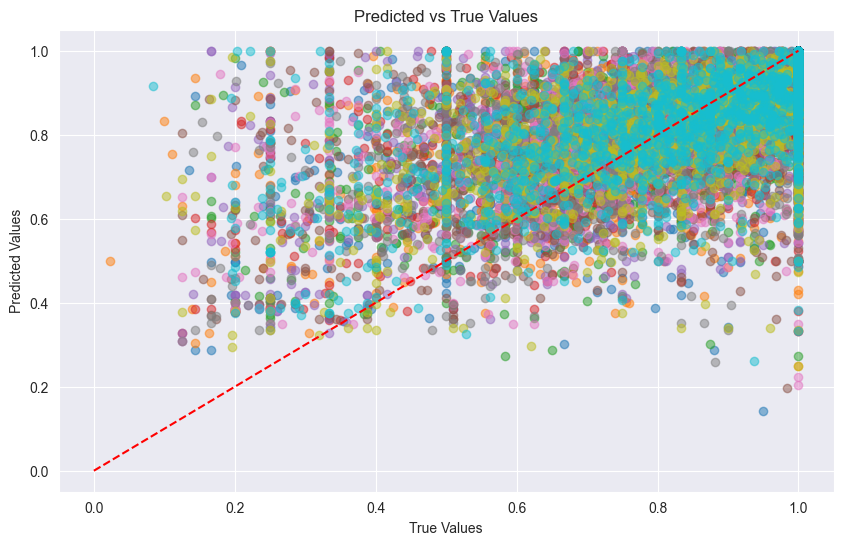

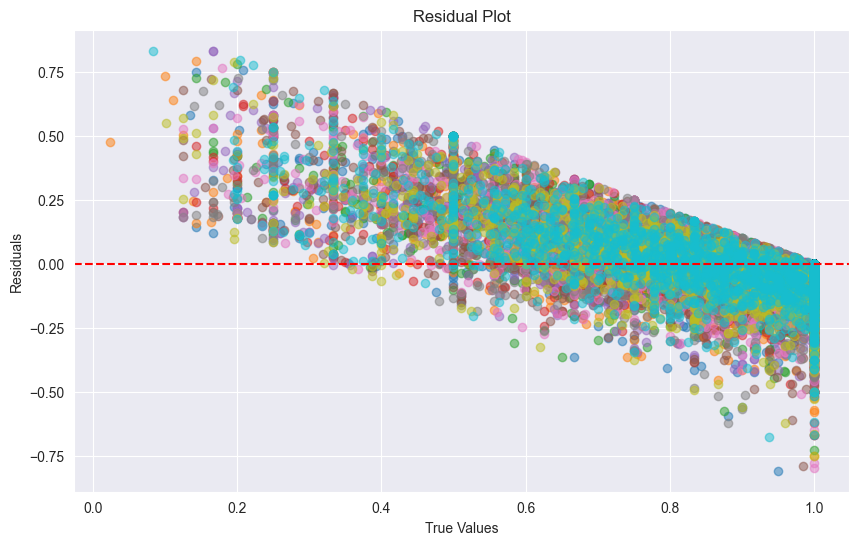

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming final_routes is your DataFrame
# Set a seed value for reproducibility
seed_value = 42
kf = KFold(n_splits=10, shuffle=True, random_state=seed_value)

final_routes = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

stats = []

for train_index, test_index in kf.split(final_routes, final_routes['score']):
    train_df = final_routes.iloc[train_index]
    test_df = final_routes.iloc[test_index]

    # Calculate the average scores on the training set
    average_scores = train_df.groupby(['driver_id_sorted', 'day_of_week'])['score'].mean().reset_index()
    average_scores_dict = average_scores.set_index(['driver_id_sorted', 'day_of_week'])['score'].to_dict()

    overall_average_scores = train_df.groupby('driver_id_sorted')['score'].mean().to_dict()
    # print(train_df.groupby('driver_id_sorted')[['driver_id_sorted']].apply(lambda x: pd.Series({
    # 'driver_id_sorted': len(x['driver_id_sorted'].tolist())})))


    #Apply the calculated average scores to both the training and testing data
    train_df['average_score'] = train_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week'])), axis=1)
    test_df.loc[:, 'average_score'] = test_df.apply(lambda row: average_scores_dict.get((row['driver_id_sorted'], row['day_of_week']), overall_average_scores.get(row['driver_id_sorted'], 0.5)), axis=1)


    #Prepare the true and predicted values
    y_pred = test_df['average_score'].values
    y_true = test_df['score'].values

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    stats.append({
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "y": y_true,
        "y_pred": y_pred
    })

# Function to calculate the mean of a specific metric from the stats
def get_mean_stat(stats, stat_name):
    arr = np.array([item[stat_name] for item in stats])
    return arr.mean()

# Print the mean metrics across all folds
print('mse:', get_mean_stat(stats, 'mse'))
print('rmse:', get_mean_stat(stats, 'rmse'))
print('mae:', get_mean_stat(stats, 'mae'))
print('r2:', get_mean_stat(stats, 'r2'))

# Visualization: Predicted vs True Values
plt.figure(figsize=(10, 6))
for stat in stats:
    plt.scatter(stat['y'], stat['y_pred'], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

# Visualization: Residual Plot
plt.figure(figsize=(10, 6))
for stat in stats:
    residuals = np.array(stat['y_pred']) - np.array(stat['y'])
    plt.scatter(stat['y'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# After benchmark, continue model

In [67]:
final_routes['day_of_week_encoded'] = pd.Categorical(final_routes['day_of_week']).codes+1

def encode_day_of_week(row):
    a = np.zeros((35, 7), dtype=int)
    route_len = row['len']
    day_encoded = row['day_of_week_encoded']
    for i in range(35 - route_len, len(a)):
        a[i][day_encoded-1] = 1
    return a

final_routes['experience_feature'] = final_routes.apply(lambda x: x['len'] * [x['last_two_weeks_count']], axis = 1)
final_routes['len_feature'] = final_routes.apply(lambda x: x['len'] * [x['len']], axis = 1)
final_routes['driver_id_feature'] = final_routes.apply(lambda x: x['len'] * [x['driver_id_sorted']], axis = 1)
final_routes['day_of_week_feature'] = final_routes.apply(encode_day_of_week, axis = 1)

In [68]:
len(location_count)

10836

In [69]:
encoding_routes = []
for row in final_routes['routes']:
    encoding_route = []
    for location in row:
        encoding_route.append(locations_dic[location])
    encoding_routes.append(encoding_route)
final_routes['routes'] = encoding_routes


In [70]:
final_routes

,routes,actual_routes,driver_id,last_two_weeks_count,day_of_week,score,len,driver_id_sorted,day_of_week_encoded,experience_feature,len_feature,driver_id_feature,day_of_week_feature
0,"[5, 8526, 399, 5681, 413, 414, 415, 4676, 411,...","[1167, 1400, 1224, 1215, 1245, 1246, 1239, 134...",1675,10,Wednesday,1.000000,17,389,7,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1...","[389, 389, 389, 389, 389, 389, 389, 389, 389, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
1,"[2, 3235]","[5561, 10178]",804,3,Wednesday,1.000000,2,180,7,"[3, 3]","[2, 2]","[180, 180]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
2,"[5689, 6013, 6241, 6242, 6239, 6240, 6238, 623...","[3162, 3560, 2247, 2264, 2244, 2324, 2261, 241...",1527,5,Tuesday,0.800000,10,307,6,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]","[307, 307, 307, 307, 307, 307, 307, 307, 307, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
3,"[1356, 1356, 1356, 8734, 4617, 6464, 9584, 1806]","[10076, 7957, 10076, 10076, 7679, 9848, 9805, ...",875,4,Friday,0.625000,8,185,1,"[4, 4, 4, 4, 4, 4, 4, 4]","[8, 8, 8, 8, 8, 8, 8, 8]","[185, 185, 185, 185, 185, 185, 185, 185]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
4,"[2, 1656, 5009, 4506, 3206, 4747, 1658, 1526, ...","[5561, 5558, 9621, 9460, 8916, 9436, 10838, 10...",430,10,Wednesday,0.875000,9,126,7,"[10, 10, 10, 10, 10, 10, 10, 10, 10]","[9, 9, 9, 9, 9, 9, 9, 9, 9]","[126, 126, 126, 126, 126, 126, 126, 126, 126]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19592,"[1275, 2027, 2027, 4051, 2034, 3167, 2029, 203...","[7166, 8132, 8132, 8133, 8281, 9270, 7952, 824...",678,6,Tuesday,0.750000,13,116,6,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...","[116, 116, 116, 116, 116, 116, 116, 116, 116, ...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
19593,"[5, 4517, 5219, 725, 2555]","[1167, 2279, 1646, 1694, 979]",1193,2,Wednesday,0.833333,5,57,7,"[2, 2, 2, 2, 2]","[5, 5, 5, 5, 5]","[57, 57, 57, 57, 57]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
19594,"[1671, 1672, 1672]","[5392, 5553, 5553]",430,6,Thursday,1.000000,3,126,5,"[6, 6, 6]","[3, 3, 3]","[126, 126, 126]","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."
19595,"[5, 1019, 1018, 1017, 1016, 1032, 1022, 1024, ...","[1167, 2335, 2341, 2394, 2362, 2377, 2348, 237...",1207,5,Monday,0.851852,18,67,2,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 6...","[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0],..."


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'score']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['score']
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int)

kf = KFold(n_splits=10)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df.iloc[train_index], o_train_df.iloc[test_index]
    o_y_train, o_y_test = o_y.iloc[train_index], o_y.iloc[test_index]

    model = RandomForestRegressor()
    model.fit(o_x_train, o_y_train)

    y_pred = model.predict(o_x_test)
    y_true = o_y_test

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics across all folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f"MSE: {mean_mse}")
print(f"RMSE: {mean_rmse}")
print(f"MAE: {mean_mae}")
print(f"R2: {mean_r2}")

MSE: 0.0226919138925617
RMSE: 0.15059989776977206
MAE: 0.10606301927659274
R2: 0.3339024262032263


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Assuming final_routes dataframe and relevant imports are available
o_test_df = final_routes[['driver_id_sorted', 'day_of_week_encoded', 'score']]
o_day_of = pd.get_dummies(o_test_df['day_of_week_encoded'])
o_driver = pd.get_dummies(o_test_df['driver_id_sorted'])
o_y = o_test_df['score'].values
o_train_df = pd.concat([o_day_of, o_driver], axis=1).astype(int).values

kf = KFold(n_splits=10)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Training settings
num_epochs = 100
learning_rate = 0.001

for train_index, test_index in kf.split(o_train_df):
    o_x_train, o_x_test = o_train_df[train_index], o_train_df[test_index]
    o_y_train, o_y_test = o_y[train_index], o_y[test_index]

    # Convert to PyTorch tensors
    o_x_train = torch.tensor(o_x_train, dtype=torch.float32)
    o_x_test = torch.tensor(o_x_test, dtype=torch.float32)
    o_y_train = torch.tensor(o_y_train, dtype=torch.float32).view(-1, 1)
    o_y_test = torch.tensor(o_y_test, dtype=torch.float32).view(-1, 1)

    model = SimpleNN(o_x_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(o_x_train)
        loss = criterion(outputs, o_y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred = model(o_x_test)
        y_true = o_y_test

    y_pred = y_pred.numpy()
    y_true = y_true.numpy()

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics across all folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f"MSE: {mean_mse}")
print(f"RMSE: {mean_rmse}")
print(f"MAE: {mean_mae}")
print(f"R2: {mean_r2}")

MSE: 0.021768782287836075
RMSE: 0.1475062370300293
MAE: 0.10653918981552124
R2: 0.3610180835074102


In [73]:
# unique_days = final_routes['day_of_week'].unique()
# day_of_week_encoded = pd.get_dummies(final_routes['day_of_week'], prefix='day_of_week')
# final_routes = pd.concat([final_routes, day_of_week_encoded], axis=1)
# final_routes

# Model

In [74]:
def padding_(routes, route_len):
    features = np.zeros((len(routes), route_len),dtype=np.float16)
    for ii, route in enumerate(routes):
        if len(route) != 0:
            features[ii, -len(route):] = np.array(route)[:route_len]
    return features

X = final_routes.drop(columns = ['driver_id', 'last_two_weeks_count', 'len', 'driver_id_sorted','day_of_week_encoded'])
max_route_length = max(len(item) for item in final_routes['routes'])
y = np.array(final_routes['score'])
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), X.to_numpy()[:,2:]], axis=1)
# X = np.concatenate([padding_(X['routes'], max_route_length),padding_(X['distance_route'], max_route_length), padding_(X['experience_feature'], max_route_length), padding_(X['len_feature'], max_route_length), padding_(X['driver_id_feature'], max_route_length)], axis=1)
# X = X.astype(np.float16)
# X = X.astype(int) #for boolean values, to converst from string to int
# final_routes

## List of features

routes
distance_route
experience_feature
len_feature
driver_id_feature

Total: 175


In [75]:
from torch.utils.data import Dataset, DataLoader
import torch
import random

seed_value = 42
device = "cpu"


g = torch.Generator()

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Additional steps if using DataLoaders (to ensure reproducibility in data loading)
torch.use_deterministic_algorithms(True)

def reset_random():
    g.manual_seed(seed_value)
    torch.manual_seed(seed_value)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [76]:
import torch #pytorch
import torch.nn as nn

In [ ]:
class PredictionRNN(nn.Module):
    def __init__(self,no_layers,vocab_size, vocab_size_driv, vocab_size_len,hidden_dim,embedding_dim,embedding_dim_driv,embedding_dim_len, output_dim,additional_feature_count,drop_prob=0.5):
        super(PredictionRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.vocab_size_driv = vocab_size_driv
        self.vocab_size_len = vocab_size_len

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding_driv = nn.Embedding(vocab_size_driv, embedding_dim_driv)
        self.embedding_len = nn.Embedding(vocab_size_len, embedding_dim_len)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)
        # embedding_dim_driv+2
        # self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
        #                    num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        self.fc_lstm = nn.Linear(self.hidden_dim, 64)
        # self.fc_static_1 = nn.Linear(embedding_dim_driv+7, 16)
        # self.fc_static_2 = nn.Linear(16, 16)

        # linear and sigmoid layer
        # self.fc = nn.Linear(self.hidden_dim + additional_feature_count, output_dim)
        # self.fc = nn.Linear(self.hidden_dim + embedding_dim_driv, output_dim) #withfeatures
        # self.fc = nn.Linear(embedding_dim_driv+7+1, 256)
        # self.fc = nn.Linear(80,16)
        self.fc = nn.Linear(64,16)
        self.layer2 = nn.Linear(16, 16)
        self.layer3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

        # self.fc = nn.Linear(36, output_dim)
        # self.fc = nn.Linear(1316, output_dim)
        # self.sig = nn.Sigmoid()

    def forward(self,x):
        batch_size = len(x['routes'])
        route_ids = x['routes'].int()
        # print(route_ids.shape, route_ids.max(), route_ids)
        embeds = self.embedding(route_ids)  # shape: B x S x Feature   since batch = True

        # get driver ids example
        driver_ids = x['driver_id_feature'].int()
        experience = x['experience_feature'].int()
        day_of_week_feature = x['day_of_week_feature'].int()
        # distance_route_feature = x['distance_route'].int()
        # print('day_of_week', day_of_week.shape, day_of_week)
        # print('len_feature', len_feature, len_feature.shape)
        # raise 'error'
        # distance = x['distance_route'].int()
        # latitudes = x['current_lat'].int()
        # longtitudes = x['current_lng'].int()
        embedding_driv = self.embedding_driv(driver_ids)
        # embedding_len = self.embedding_len(len_feature)

        # experience.view(batch_size, max_route_length, 1)
        # all_static = torch.concatenate((embedding_driv, day_of_week_feature), dim=2)
        # torch.concatenate((embeds, distance_route_feature.view(batch_size, max_route_length, 1)),dim=2)
        lstm_out, _ = self.lstm(embeds)
        lstm_out = lstm_out.contiguous().view(batch_size, max_route_length, self.hidden_dim)
        out = self.dropout(lstm_out)
        out = self.fc_lstm(out)
        # out = torch.concatenate((out, all_embeds), dim=2)
        # out_static = self.fc_static_1(all_static)
        # out_static = self.dropout(self.fc_static_2(out_static))
        # out = self.fc(torch.concatenate((out, out_static), dim=2))
        out = self.fc(out)
        x = self.relu(out)
        x = self.relu(self.layer2(x))
        out = self.layer3(x)
        # print(out.shape)
        # sigmoid function
        # sig_out = self.sig(out)
        # print(sig_out.shape)

        # reshape to be batch_size first
        sig_out = out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        # print(sig_out.shape)
        return sig_out

In [ ]:
def get_model():
    no_layers = 2
    vocab_size = 10837 #extra 1 for padding
    vocab_size_driv = 413
    vocab_size_len = 36 #extra 1 for padding
    embedding_dim = 64 #was 64
    embedding_dim_driv = 12 #was 64
    embedding_dim_len = 2 #was 64
    output_dim = 1
    hidden_dim = 128 #was 64


    model = PredictionRNN(no_layers,vocab_size, vocab_size_driv, vocab_size_len, hidden_dim,embedding_dim, embedding_dim_driv,embedding_dim_len, output_dim,len(drivers_dic),drop_prob=0.5)
    model.train()
    print(model)
    return model

In [ ]:
# function to predict accuracy
# def acc(pred,label):
#     pred = torch.round(pred.squeeze())
#     return torch.sum(pred == label.squeeze()).item()

def rmse(pred, label):
    return torch.sqrt(torch.mean((pred.squeeze() - label.squeeze())**2))

# def get_precision(pred, label):
#     pred = torch.round(pred.squeeze())
#     true_positive = torch.sum((pred == 1) & (label.squeeze() == 1)).item()
#     false_positive = torch.sum((pred == 1) & (label.squeeze() == 0)).item()
#
#     if true_positive + false_positive == 0:
#         return 0.0, true_positive, false_positive  # Handle the case where there are no predicted positives
#
#     precision_value = true_positive / (true_positive + false_positive)
#     return precision_value, true_positive, false_positive

In [ ]:
RUN_NAME = 'first_run_4'
def train_model(data, model, epochs = 20):
    train_loader, valid_loader = data
    lr=0.0005

    criterion = nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    clip = 5
    valid_loss_min = np.Inf
    # train for some number of epochs
    epoch_tr_loss,epoch_vl_loss = [],[]
    epoch_tr_acc,epoch_vl_acc = [],[]
    epoch_tr_precision,epoch_vl_precision = [],[]
    # wandb.init(project='Route_classification', name=f'{run_name}')

    for epoch in range(epochs):
        train_losses = []
        train_rmse = 0.0
        model.train()
        for inputs, labels in train_loader:
            # print(labels)

            model.zero_grad()
            # print(inputs.shape, h[0].shape, h[1].shape)
            output = model(inputs)

            # calculate the loss and perform backprop
            # print(output, labels)
            # print(output.shape, labels.shape)
            loss = criterion(output.view(-1), labels.float())
            loss.backward()
            train_losses.append(loss.item())
            train_rmse += rmse(output,labels)
            #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(model.parameters(), clip)
            optimizer.step()
        val_losses = []
        val_rmse = 0.0
        model.eval()
        for inputs, labels in valid_loader:
                # inputs, labels = inputs.to(device), labels.to(device)
                output = model(inputs)
                val_loss = criterion(output.view(-1), labels.float())
                val_losses.append(val_loss.item())
                val_rmse += rmse(output,labels)

        epoch_train_loss = np.mean(train_losses)
        epoch_val_loss = np.mean(val_losses)

        epoch_tr_loss.append(epoch_train_loss)
        epoch_vl_loss.append(epoch_val_loss)
        epoch_train_rmse = train_rmse / len(train_loader)
        epoch_val_rmse = val_rmse / len(valid_loader)
        print(f'Epoch {epoch+1}')
        print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
        print(f'train_rmse : {epoch_train_rmse} val_rmse : {epoch_val_rmse}')

        if epoch_val_loss <= valid_loss_min:
            torch.save(model.state_dict(), f'{RUN_NAME}.pt')
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
            valid_loss_min = epoch_val_loss
        print(25*'==')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def get_stats(model, data):
    model.eval()
    y_pred = []
    y = []
    for inputs, labels in data:
        y.extend(labels)
        results = model(inputs).detach()
        y_pred.extend(results)

    y = np.array(y)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return {
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "y": y,
        "y_pred":y_pred
    }


In [119]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=seed_value)
stats = []

FEATURE_COLUMNS = ['routes', 'driver_id_feature','experience_feature', 'day_of_week_feature']


class DataFrameDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        item = {}
        for col in FEATURE_COLUMNS:
            feature = self.df[col].iloc[idx]
            if isinstance(feature, list):
                feature = padding_([feature], max_route_length)[0]
            item[col] = feature
        item['score'] = self.df['score'].iloc[idx]
        return item, item['score']

def get_data_loaders(train_df, test_df):
    # create Tensor datasets
    train_data = DataFrameDataset(train_df)
    valid_data = DataFrameDataset(test_df)

    # dataloaders
    batch_size = 32

    # make sure to SHUFFLE your data
    train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, generator=g, worker_init_fn=seed_worker)
    return train_loader, valid_loader

shuffled_df = final_routes.sample(frac=1, random_state=42).reset_index(drop=True)

for train_index, test_index in kf.split(shuffled_df, shuffled_df['score']):
    train_df = shuffled_df.iloc[train_index]
    test_df = shuffled_df.iloc[test_index]

    train_loader, valid_loader = get_data_loaders(train_df, test_df)
    print(f'len(train_df) = {len(train_df)}, len(test_df) = {len(test_df)}')
    model = get_model()
    model.train()

    train_model((train_loader, valid_loader), model, epochs=30)
    model = get_model()
    model.load_state_dict(torch.load(f'{RUN_NAME}.pt'))
    stats.append(get_stats(model, valid_loader))

len(train_df) = 17637, len(test_df) = 1960
PredictionRNN(
  (embedding): Embedding(10837, 32)
  (embedding_driv): Embedding(413, 8)
  (embedding_len): Embedding(36, 2)
  (lstm): LSTM(32, 32, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc_lstm): Linear(in_features=32, out_features=32, bias=True)
  (fc): Linear(in_features=32, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch 1
train_loss : 0.1018098159102669 val_loss : 0.026095986471421296
train_rmse : 0.26019373961619857 val_rmse : 0.15973588613714637
Validation loss decreased (inf --> 0.026096).  Saving model ...
Epoch 2
train_loss : 0.02692341795731066 val_loss : 0.022363059267762206
train_rmse : 0.1618665918844329 val_rmse : 0.14750137166674038
Validation loss decreased (0.026096 --> 0.022363).  Saving model ...
Epoch 3
train_loss : 0.022559512278362028 val_loss : 0.0214405

mse: 0.019705136605838544
rmse: 0.14031487202173734
mae: 0.10114685335348692
r2: 0.42114532157800244


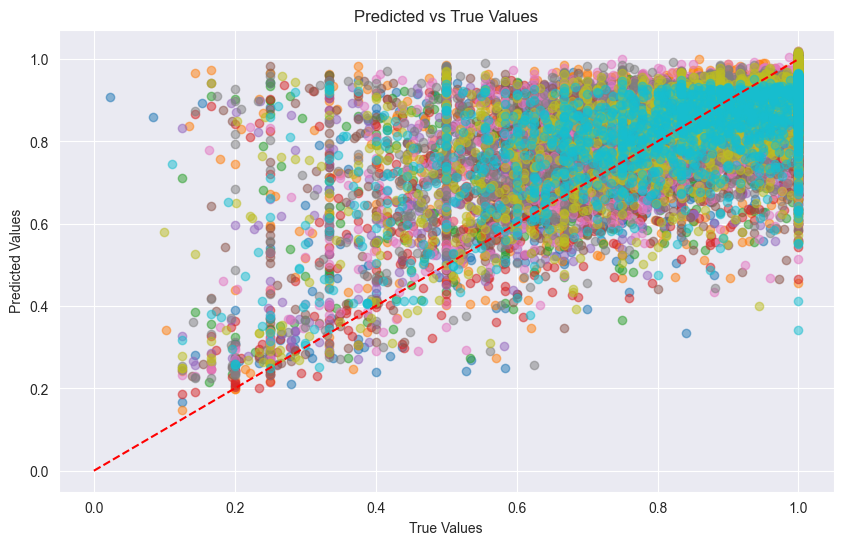

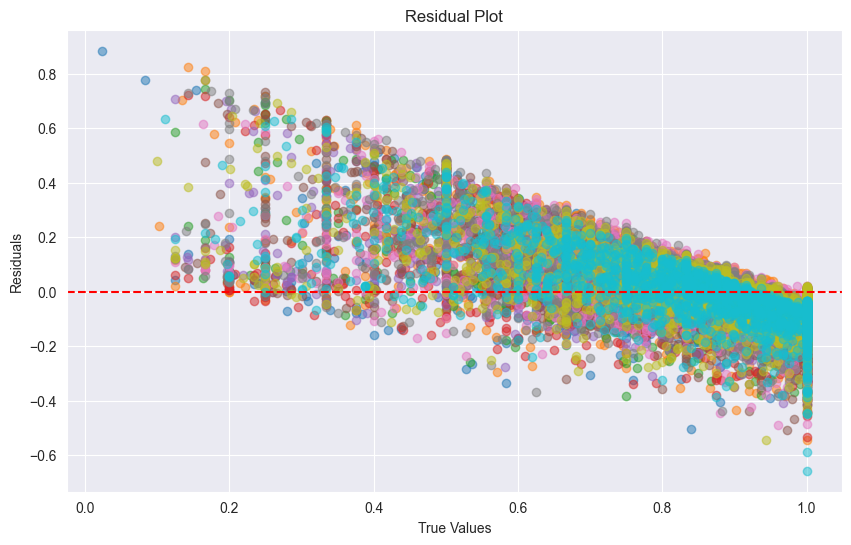

In [120]:
def get_mean_stat(stats, stat_name):
    # Calculate mean for regression stats
    arr = np.array([item[stat_name] for item in stats])
    return arr.mean()
print('mse:', get_mean_stat(stats, 'mse'))
print('rmse:', get_mean_stat(stats, 'rmse'))
print('mae:', get_mean_stat(stats, 'mae'))
print('r2:', get_mean_stat(stats, 'r2'))

# If you want to visualize the distribution of predictions vs actual values
plt.figure(figsize=(10, 6))
for stat in stats:
    plt.scatter(stat['y'], stat['y_pred'], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

# If you want to visualize the residuals
plt.figure(figsize=(10, 6))
for stat in stats:
    residuals = np.array(stat['y_pred']) - np.array(stat['y'])
    plt.scatter(stat['y'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
#
# reset_random()
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=seed_value)
# train_loader, valid_loader = get_data_loaders(X_train, y_train, X_val, y_val)
#
# model = get_model()
# # summary(model, input_size=(1,9))
# model.train()
#
# train_model((train_loader, valid_loader), model, epochs=50)
#
# get_stats(model, valid_loader)

In [ ]:
get_stats(model, valid_loader)
# def get_mean_stat(stats, stat_name) -> float:
#     return np.array([item[stat_name] for item in stats]).mean()
#
# print('acc:', get_mean_stat(stats, 'acc'))
# print('precision:', get_mean_stat(stats, 'precision'))
# print('recall:', get_mean_stat(stats, 'recall'))
# print('f1:', get_mean_stat(stats, 'f1'))
# print('roc_auc:', get_mean_stat(stats, 'roc_auc'))
# print('average_precision:', get_mean_stat(stats, 'average_precision'))

In [ ]:
print(stats)

In [ ]:
print(model.fc.weight)